Projekt 4: KI-Vertriebsassistent „SalesGPT“

Ziel: Die Vertriebsmannschaft im IT-Bereich durch ein KI-Tool bei der Angebotserstellung, Kundenanalyse und Tagesplanung effizienter unterstützen.

Bitte entwickeln Sie einen Projektplan für ein KI-Projekt aus Ihrem Bereich.
Folgende Fragen sollen beantwortet werden:

1.	Welche KI-Potentiale sind möglich? 
2.	Welche Projektmethoden (Scrum oder prozessorientierte Methode) soll verwendet werden
3.	Erstellen Sie den Zeitplan erstellen, die Kosten
4.	Es sollen die Kennzahlen: Ertragswert, SV und CPI sollen verwendet werden, 
5.	Bitte ein Projekt, z.B. über 4 Wochen entwickeln mit Plan und Kosten und auch einer ersten Programmidee.


Ich möchte den gesamten Prozess wie ein echtes KI-gesteuertes Vertriebs-Automationssystem strukturieren:
📥 E-Mail → 📊 ERP → 🧾 Angebot → 📤 E-Mail


In [ ]:

# 1. E-Mail-Anfrage empfangen (Empfangsteil)

# ZIEL: E-Mail-Inhalt automatisch auslesen (Betreff, Text, evtl. Kundendaten extrahieren)
# EINFÜGEN GANZ AM ANFANG (... vor Erzeugung Angebot):

# Abrufen eingehender Mails (nur exemplarisch, IMAP-Anbindung notwendig)
import imaplib
import email

imap = imaplib.IMAP4_SSL("imap.mailserver.de")
imap.login("vertrieb@byten.de", "PASSWORT")
imap.select("INBOX")

# letzte Mail abrufen (vereinfacht)
status, messages = imap.search(None, 'UNSEEN')
mail_ids = messages[0].split()
if mail_ids:
    _, data = imap.fetch(mail_ids[-1], "(RFC822)")
    message = email.message_from_bytes(data[0][1])
    betreff = message["Subject"]
    absender = message["From"]
    inhalt = message.get_payload(decode=True).decode()

    print("Betreff:", betreff)
    print("Von:", absender)
    print("Inhalt:", inhalt)


In [ ]:
# 2. Daten abrufen aus NetSuite ERP (Produkt/Kundendaten)

# ZIEL: Kundenprofil + Produktpreise + Konfiguration automatisch aus ERP-System ziehen
# EINFÜGEN DIREKT NACH MAIL-ANALYSE – ERSETZT lokale Listen wie kundenliste & produktbeschreibung:

# Simulierter Zugriff auf NetSuite (REST API)

# import requests
# url = "https://api.netsuite.com/v1/customers"
# headers = {"Authorization": "Bearer <API_KEY>"}
# response = requests.get(url, headers=headers)
# kunden_daten = response.json()

# Beispiel: Suche Kunden-ID aus Absender
# produkt_info = {"name": "XMG NEO 16", "preis": 2699.00}


 Folgendes beinhaltet:


Angebotsgenerator mit Rabattstaffel
Automatisiert erstellt, angepasst auf Anfrage: 10 Geräte = 5 % Rabatt

Kundenname wird automatisch gezogen (Bsp. spezifischer Rabatt/ ...treue starke Kunden, Sonderkonditionen)

Rabattregelung:

1–4 Geräte = 0 %

5–9 Geräte = 2 %

10+ Geräte = 5 %

Sehr geehrter Herr Dr.-Ing. Ralf Lauterbach,

vielen Dank für Ihre Anfrage über 10 Geräte des folgenden Produkts:

XMG NEO 16 (E25)
The One
- max. 16" Mini-LED | 2560x1600 px | 1000 Nits | 300 Hz
- Intel Core Ultra 9 275HX | bis zu 5,4 GHz
- max. NVIDIA GeForce RTX 5090 | DLSS 4
- max. 128 GB DDR5 RAM | 6400 MHz
Aktuelle Konfiguration: 2.699,00 Euro (pro Gerät, ohne Rabatt)

Stückpreis: 2699.00 €
Rabatt: 5%
Gesamtpreis (nach Rabatt): 25,640.50 €

Gern stehen wir Ihnen für Rückfragen oder eine individuelle Beratung zur Verfügung.

Mit freundlichen Grüßen

Ihr Vertriebsteam



C:\Users\SCHENKER DTR 17\AppData\Local\Temp\ipykernel_17636\1186076078.py:142: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


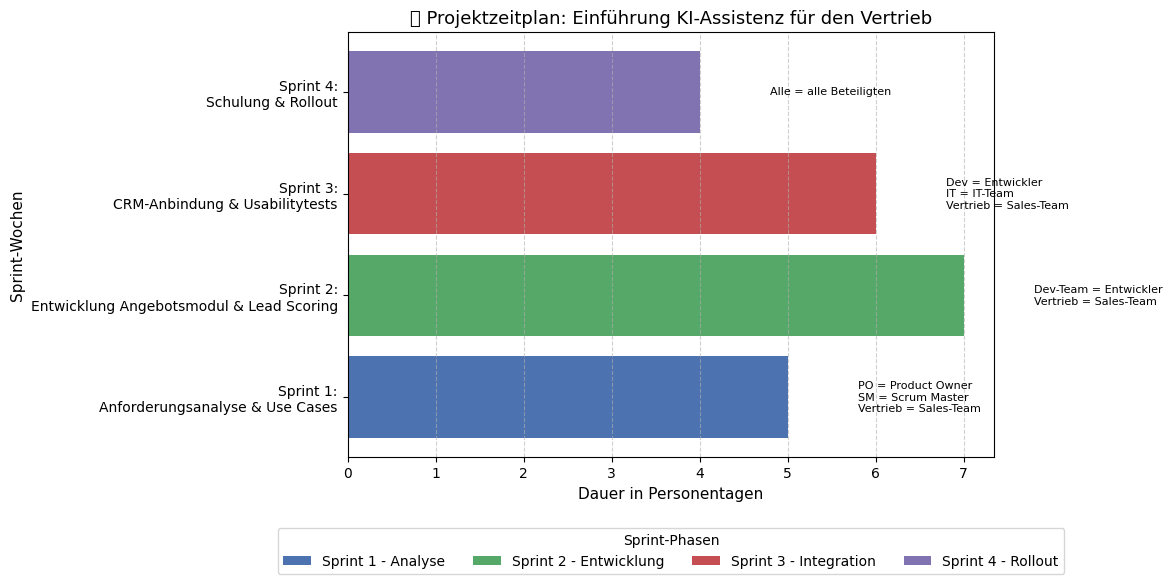

In [5]:
# 3. Angebot erzeugen (wie hier im Beispiel)

# ZIEL: Angebot anhand der abgerufenen ERP-Daten generieren
# Dieser Teil bleibt, wie hier schon gut programmiert ist – nur die Variablen werden aus ERP und Mail befüllt.


# Import Bibliotheken
import pandas as pd
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Produktbeschreibung (nicht umbrechen!)
# Beispiel-Produkt "bestware.com"
produktbeschreibung = """XMG NEO 16 (E25)
The One
- max. 16" Mini-LED | 2560x1600 px | 1000 Nits | 300 Hz
- Intel Core Ultra 9 275HX | bis zu 5,4 GHz
- max. NVIDIA GeForce RTX 5090 | DLSS 4
- max. 128 GB DDR5 RAM | 6400 MHz
Aktuelle Konfiguration: 2.699,00 Euro (pro Gerät, ohne Rabatt)"""

# Kundenliste
kundenliste = [
    "Albrecht Teich, Geschäftsführer, Stadler Mannheim GmbH",
    "Dr. Benjamin Meyer, TH Köln, Fakultät für Informatik",
    "Dr.-Ing. Ralf Lauterbach, 1stMOVER Management GmbH",
    "Torsten Baschwitz, Geschäftsführer, Digital Animals"
]

# Wir wählen einen Kunden aus
kunde = kundenliste[2]

# Folgendes ist beinhaltet:


# Angebotsgenerator mit Rabattstaffel
# Automatisiert erstellt, angepasst auf Anfrage: 10 Geräte = 5 % Rabatt

# Kundenname wird automatisch gezogen (Bsp. spezifischer Rabatt/ ...treue starke Kunden, Sonderkonditionen)

    # Rabattregelung:

        # 1-4 Geräte = 0 %
        # 5-9 Geräte = 2 %
        # 10+ Geräte = 5 %

# Rabattberechnung
def berechne_rabatt(anzahl):
    if anzahl >= 10:
        return 0.05
    elif anzahl >= 5:
        return 0.02
    else:
        return 0.00

# Angebot mit strukturierter Formatierung
def erstelle_angebot(kunde, produkttext, anzahl_geraete, einzelpreis):
    rabatt = berechne_rabatt(anzahl_geraete)
    gesamtpreis = anzahl_geraete * einzelpreis * (1 - rabatt)

    angebot = f"""Sehr geehrter Herr {kunde.split(',')[0]},

vielen Dank für Ihre Anfrage über {anzahl_geraete} Geräte des folgenden Produkts:

{produkttext}

Stückpreis: {einzelpreis:.2f} €
Rabatt: {int(rabatt * 100)}%
Gesamtpreis (nach Rabatt): {gesamtpreis:,.2f} €

Gern stehen wir Ihnen für Rückfragen oder eine individuelle Beratung zur Verfügung.

Mit freundlichen Grüßen

Ihr Vertriebsteam
"""
    return angebot

# Angebotsbeispiel
angebotstext = erstelle_angebot(kunde, produktbeschreibung, anzahl_geraete=10, einzelpreis=2699.00)
print(angebotstext)  

"""
...Einarbeitung (Personalisierung): Begrüßung, Vorstellung des zuständigen Mitarbeiter nach PLZ oder Kundengruppen, 
Branchen etc.

Cross Selling
Intelligente Produktempfehlungen für Bestandskunden.

Übergabe bei direktem Kauf durch den Kunden ... Kasse, Freigabe Übergabe an Lager und Versand

alternativ Übergabe an den zuständigen Key Account, Mitarbeiter bei größeren Kunden- Projekten oder zum Beispiel
bei nötigen Ausschreibungen

"""



# 📈 Projektzeitplan-Grafik

# 📊 Optimierte Projektgrafik mit beschrifteter Y-Achse, ausführlicher Legende, verschobener Beschriftun

aufgaben = [
    "Sprint 1:\nAnforderungsanalyse & Use Cases",
    "Sprint 2:\nEntwicklung Angebotsmodul & Lead Scoring",
    "Sprint 3:\nCRM-Anbindung & Usabilitytests",
    "Sprint 4:\nSchulung & Rollout"
]
tage = [5, 7, 6, 4]
personen = ["PO = Product Owner\nSM = Scrum Master\nVertrieb = Sales-Team",
            "Dev-Team = Entwickler\nVertrieb = Sales-Team",
            "Dev = Entwickler\nIT = IT-Team\nVertrieb = Sales-Team",
            "Alle = alle Beteiligten"]

farben = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]

plt.figure(figsize=(12, 6))
bars = plt.barh(y=aufgaben, width=tage, color=farben)

# Achsentitel & Gitterlinien
plt.xlabel("Dauer in Personentagen", fontsize=11)
plt.ylabel("Sprint-Wochen", fontsize=11)
plt.title("📊 Projektzeitplan: Einführung KI-Assistenz für den Vertrieb", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Beteiligteninformationen als zusätzliche vertikale Annotation neben Balken
for i, (bar, team) in enumerate(zip(bars, personen)):
    plt.text(bar.get_width() + 0.8, bar.get_y() + bar.get_height()/2,
             f"{team}", va='center', ha='left', fontsize=8, color='black')

# 🎯 Legende für Farbcodierung (Sprint-Zuordnung)
sprint_legende = [
    Patch(facecolor="#4C72B0", label="Sprint 1 - Analyse"),
    Patch(facecolor="#55A868", label="Sprint 2 - Entwicklung"),
    Patch(facecolor="#C44E52", label="Sprint 3 - Integration"),
    Patch(facecolor="#8172B2", label="Sprint 4 - Rollout")
]
plt.legend(handles=sprint_legende, title="Sprint-Phasen", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)


plt.tight_layout()
plt.show()


In [ ]:
# 4. Automatisch Angebot per E-Mail zurücksenden

# ZIEL: Antwort-E-Mail mit PDF/Text-Angebot an Kunden senden
# EINFÜGEN GANZ AM ENDE – nach Angebotserstellung

# 📤 E-Mail-Versand des Angebots an den Kunden
import smtplib
from email.message import EmailMessage

msg = EmailMessage()
msg["Subject"] = "Ihr persönliches Angebot von Byten"
msg["From"] = "vertrieb@byten.de"
msg["To"] = absender  # aus eingehender Mail extrahiert
msg.set_content(angebotstext)  # dein fertiger Angebotstext

# SMTP-Versand (SSL oder TLS je nach Provider)
with smtplib.SMTP_SSL("smtp.mailserver.de", 465) as smtp:
    smtp.login("vertrieb@byten.de", "PASSWORT")
    smtp.send_message(msg)


Schritt                   | Codebereich                          | Beschreibung
1. Mail empfangen         | GANZ OBEN                            | IMAP lesen, Kundenanfrage extrahieren
2. ERP-Zugriff (NetSuite) | NACH Mailauswertung                  | Kunden-/Produktdaten holen
3. Angebot erzeugen       | UNTER „angebotstext = …“             | Angebot wie bisher
4. Mail verschicken       | GANZ AM ENDE                         | Antwort per SMTP
5. Optional: PDF anhängen | (Erweiterbar mit msg.add_attachment) | Angebot als PDF versenden